# 🚢 Titanic Survival Prediction
A complete machine learning pipeline using the Titanic dataset to predict whether a passenger survived the disaster.:**
- Exploratory Data Analysis (EDA)
- Data Preprocessing
- Feature Engineering
- Model Training (Random Forest)
- Evaluation (Accuracy, Precision, Recall, F1, Confusion Matrix)
- Predicting new passengers
- Saving the model for reuse

In [83]:
import pandas as pd

In [84]:
df = pd.read_csv("titanic/train.csv")

In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [87]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 🔍 Exploratory Data Analysis (EDA)
Checking for missing values, understanding distributions, and exploring relationships between features and survival


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [90]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


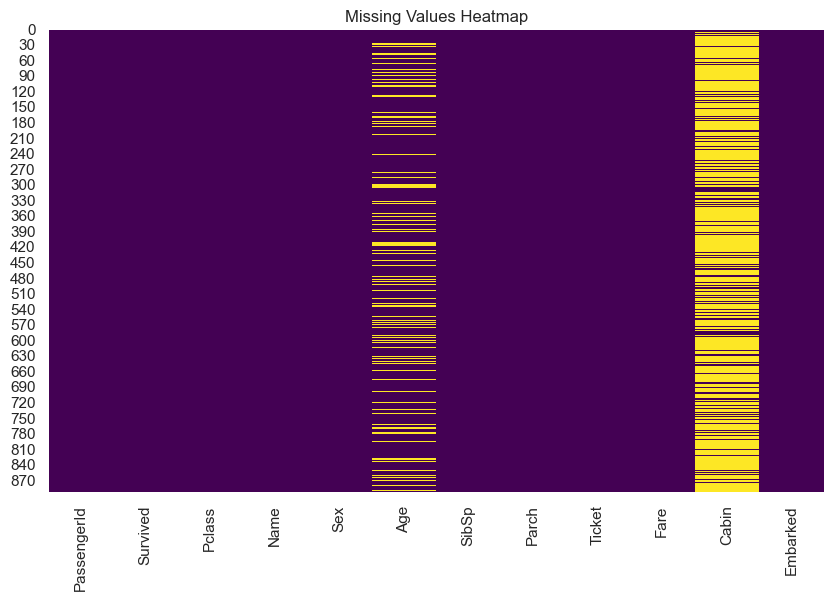

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

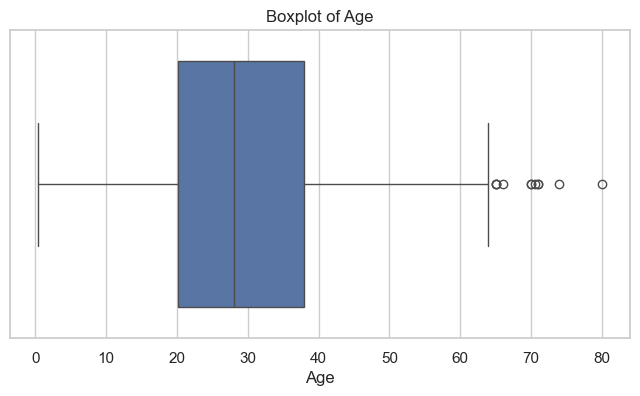

In [92]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Age')
plt.title("Boxplot of Age")
plt.show

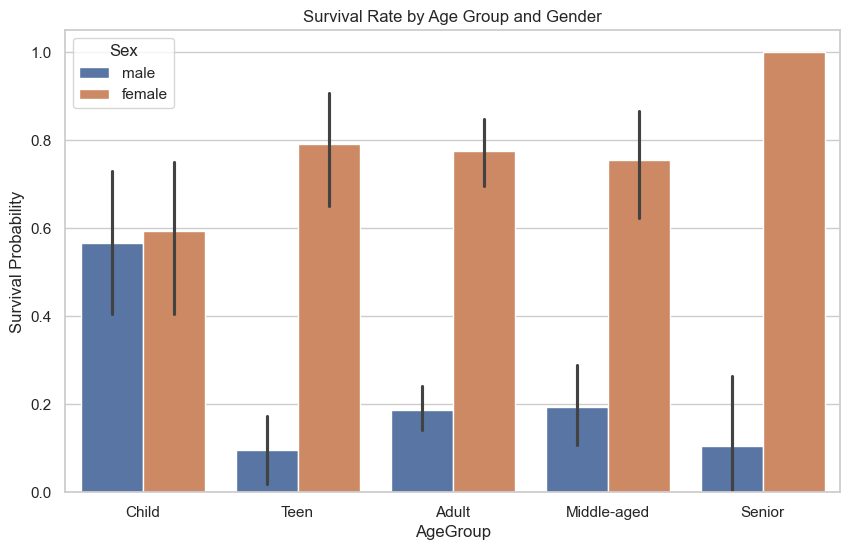

In [93]:
bins = [0, 12, 19, 40, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins = bins, labels = labels)

plt.figure(figsize=(10,6))
sns.barplot(data=df, x ='AgeGroup', y='Survived', hue = 'Sex')
plt.title("Survival Rate by Age Group and Gender")
plt.ylabel("Survival Probability")
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

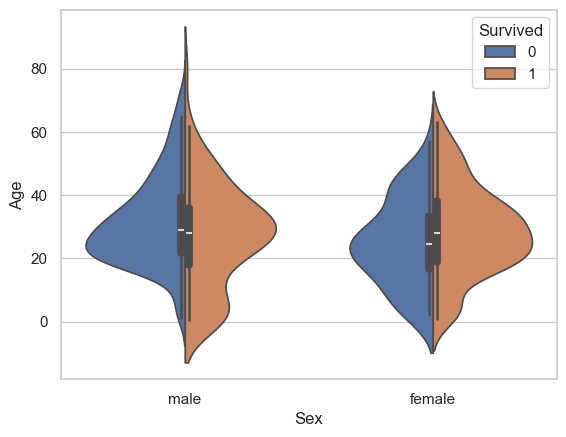

In [94]:
sns.violinplot(data=df, x='Sex', y='Age', hue='Survived', split=True)

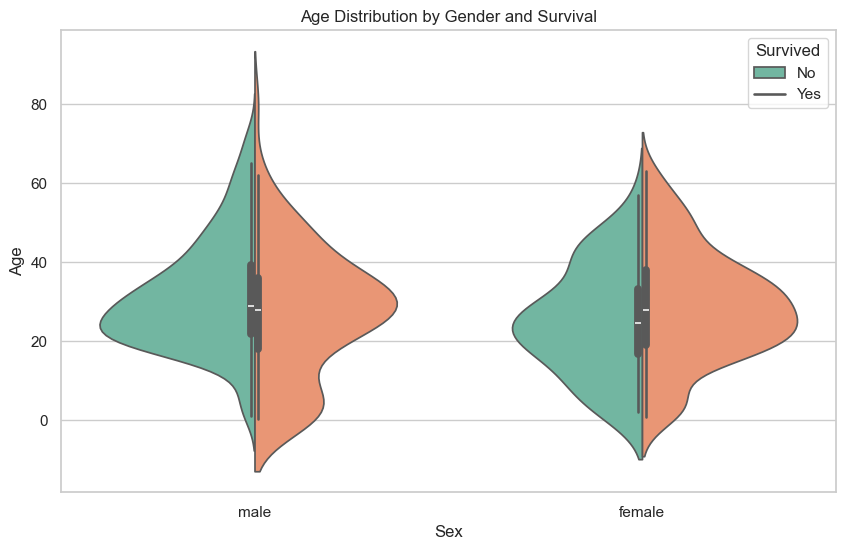

In [95]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Sex', y='Age', hue='Survived', split=True, palette="Set2")
plt.title("Age Distribution by Gender and Survival")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

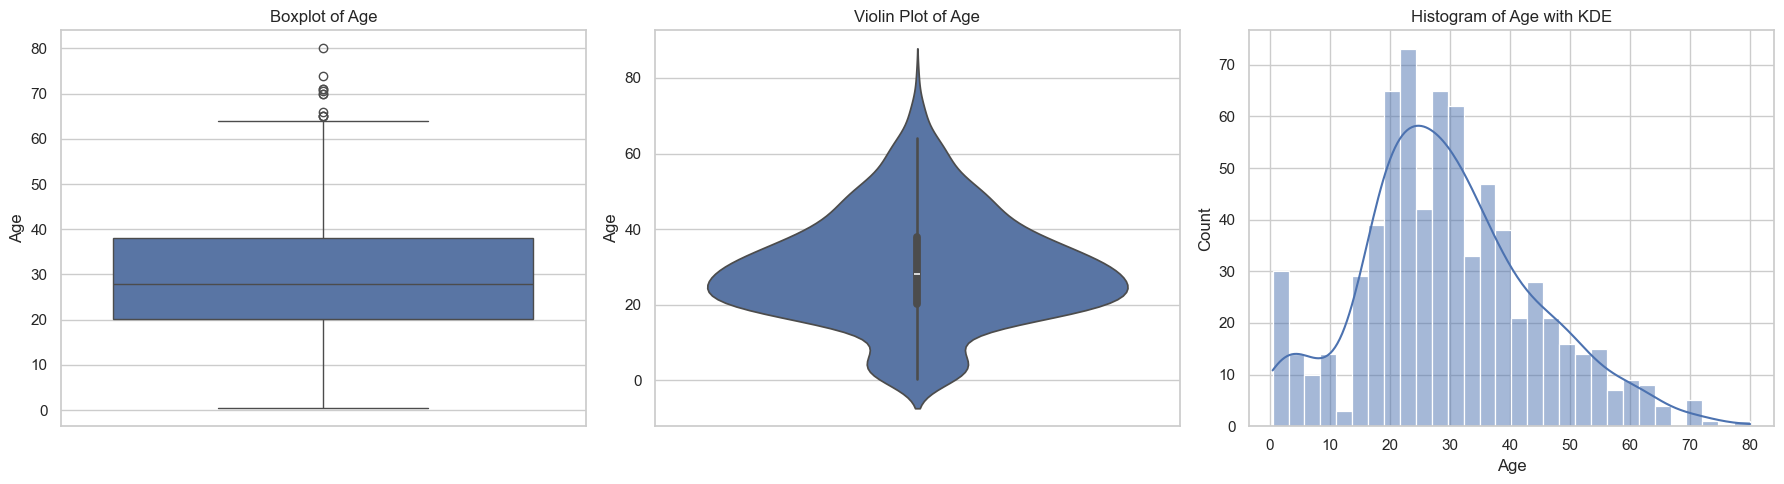

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(18, 5))

# 1️⃣ Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='Age')
plt.title("Boxplot of Age")

# 2️⃣ Violinplot
plt.subplot(1, 3, 2)
sns.violinplot(data=df, y='Age')
plt.title("Violin Plot of Age")

# 3️⃣ Histogram
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title("Histogram of Age with KDE")

plt.tight_layout()
plt.show()

## 🛠 Data Cleaning and Preprocessing

We’ll:
- Fill missing values
- Encode categorical variables
- Engineer new features (AgeGroup)
- Drop unused clumns


In [97]:
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     889 non-null    object  
 9   AgeGroup     714 non-null    category
dtypes: category(1), float64(2), int64(5), object(2)
memory usage: 63.9+ KB


In [99]:
df['Age'].fillna(df['Age'].median())
df['Embarked'].fillna(df['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [100]:
df['Sex']=df['Sex'].map({'male': 0, 'female': 1})
df=pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   AgeGroup     714 non-null    category
 9   Embarked_Q   891 non-null    bool    
 10  Embarked_S   891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(6)
memory usage: 58.6 KB


In [102]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,AgeGroup,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,Adult,False,True
1,2,1,1,1,38.0,1,0,71.2833,Adult,False,False
2,3,1,3,1,26.0,0,0,7.9250,Adult,False,True
3,4,1,1,1,35.0,1,0,53.1000,Adult,False,True
4,5,0,3,0,35.0,0,0,8.0500,Adult,False,True


In [103]:
#df.drop('AgeGroup', axis=1)

In [104]:
#x = df.drop('Survived', axis = 1)

In [105]:
df= pd.get_dummies(df, columns=['AgeGroup'], drop_first= True)

In [106]:
if 'AgeGroup' in df.columns:
    df.drop('AgeGroup', axis=1, inplace=True)

In [107]:
print(df.select_dtypes(include=['object', 'category']))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[891 rows x 0 columns]


In [108]:
print(df.dtypes)

PassengerId               int64
Survived                  int64
Pclass                    int64
Sex                       int64
Age                     float64
SibSp                     int64
Parch                     int64
Fare                    float64
Embarked_Q                 bool
Embarked_S                 bool
AgeGroup_Teen              bool
AgeGroup_Adult             bool
AgeGroup_Middle-aged       bool
AgeGroup_Senior            bool
dtype: object


In [109]:
print(df.isnull().sum())

PassengerId               0
Survived                  0
Pclass                    0
Sex                       0
Age                     177
SibSp                     0
Parch                     0
Fare                      0
Embarked_Q                0
Embarked_S                0
AgeGroup_Teen             0
AgeGroup_Adult            0
AgeGroup_Middle-aged      0
AgeGroup_Senior           0
dtype: int64


In [110]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [111]:
assert X.isnull().sum().sum() == 0, "Still has NaNs!"
print("✅ No NaNs remaining — ready to model")

✅ No NaNs remaining — ready to model


In [112]:
X = df.drop('Survived', axis=1)
y = df['Survived']

## 📐 Scaling & Splitting

We'll split the data into training and test sets, then standardize numerical feature.


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train) 

LogisticRegression(max_iter=1000)

Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



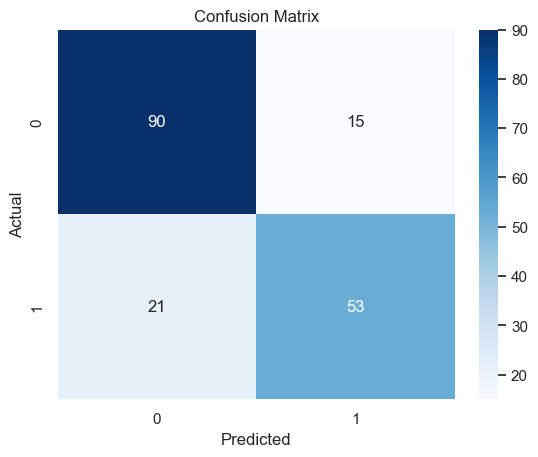

In [114]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_preds = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, log_preds))

print(classification_report(y_test, log_preds))

cm = confusion_matrix(y_test, log_preds)

sns.heatmap(cm, annot = True, fmt= "d", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [115]:
tn, fp, fn, tp = cm.ravel()

In [116]:
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 90
False Positives (FP): 15
False Negatives (FN): 21
True Positives (TP): 53


## 🤖 Model Training: Random Forest

Training a Random Forest Classifier to predict surviva.


In [117]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 📊 Model Evaluation

We'll evaluate using:
- Accuracy
- Precision
- Recall
- F1 Score
- Confusion Matrix (visulized)


In [118]:
rf_preds = rf_model.predict(X_test)

In [119]:
from sklearn.metrics import confusion_matrix

# Get confusion matrix
cm_rf = confusion_matrix(y_test, rf_preds)
print("Random Forest Confusion Matrix:")
print(cm_rf)

# Unpack the values
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()

print(f"True Negatives (TN): {tn_rf}")
print(f"False Positives (FP): {fp_rf}")
print(f"False Negatives (FN): {fn_rf}")
print(f"True Positives (TP): {tp_rf}")


Random Forest Confusion Matrix:
[[95 10]
 [17 57]]
True Negatives (TN): 95
False Positives (FP): 10
False Negatives (FN): 17
True Positives (TP): 57


In [120]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)


# Logistic Regression metrics
log_preds = log_model.predict(X_test)
acc_log = accuracy_score(y_test, log_preds)
prec_log = precision_score(y_test, log_preds)
rec_log = recall_score(y_test, log_preds)
f1_log = f1_score(y_test, log_preds)

# Random Forest metrics
rf_preds = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, rf_preds)
prec_rf = precision_score(y_test, rf_preds)
rec_rf = recall_score(y_test, rf_preds)
f1_rf = f1_score(y_test, rf_preds)

# Print results
print("📊 Logistic Regression:")
print(f"Accuracy : {acc_log:.4f}")
print(f"Precision: {prec_log:.4f}")
print(f"Recall   : {rec_log:.4f}")
print(f"F1 Score : {f1_log:.4f}")

print("\n🌲 Random Forest:")
print(f"Accuracy : {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall   : {rec_rf:.4f}")
print(f"F1 Score : {f1_rf:.4f}")

📊 Logistic Regression:
Accuracy : 0.7989
Precision: 0.7794
Recall   : 0.7162
F1 Score : 0.7465

🌲 Random Forest:
Accuracy : 0.8492
Precision: 0.8507
Recall   : 0.7703
F1 Score : 0.8085


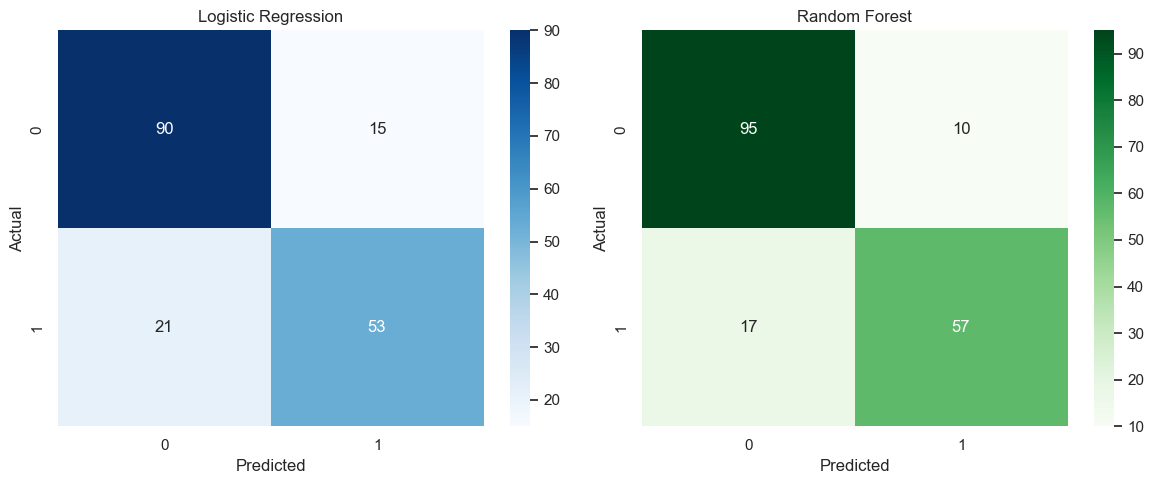

In [121]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrices
cm_log = confusion_matrix(y_test, log_preds)
cm_rf = confusion_matrix(y_test, rf_preds)

# Plot both
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


## 💾 Saving Model, Scaler, and Columns

We’ll save:
- Trained model
- StandardScaler
- Feature column names

So we can reload it and use itlater!


In [122]:
import joblib

joblib.dump(rf_model, 'titanic_random_forest_model.pkl')
print("Model saved ✅")

Model saved ✅


In [123]:
import joblib
loaded_model = joblib.load('titanic_random_forest_model.pkl')

preds = loaded_model.predict(X_test)

In [124]:
joblib.dump(scaler, 'titanic_scaler.pkl')

['titanic_scaler.pkl']

In [125]:
loaded_scaler = joblib.load('titanic_scaler.pkl')

In [126]:
print(X.isnull().sum())
print(X.isnull().sum().sum())

PassengerId             0
Pclass                  0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Fare                    0
Embarked_Q              0
Embarked_S              0
AgeGroup_Teen           0
AgeGroup_Adult          0
AgeGroup_Middle-aged    0
AgeGroup_Senior         0
dtype: int64
0


In [127]:
joblib.dump(rf_model, 'titanic_random_forest_model.pkl')
print("✅ Random Forest model saved!")

✅ Random Forest model saved!


In [128]:
# Load model
loaded_model = joblib.load('titanic_random_forest_model.pkl')

In [129]:
# Save the exact column names and order
feature_columns = X.columns.tolist()
joblib.dump(feature_columns, 'titanic_feature_columns.pkl')

['titanic_feature_columns.pkl']

## 🎯 Predicting on New Passengers

Reusable function that takes raw data, scales, predicts, and prints readable results with confidence level.


In [130]:
new_data = pd.DataFrame([
    {
        'Pclass': 1,
        'Sex': 0,  # male
        'Age': 45,
        'SibSp': 0,
        'Parch': 0,
        'Fare': 84.5,
        'Embarked_Q': 0,
        'Embarked_S': 0,
        'AgeGroup_Teen': 0,
        'AgeGroup_Adult': 0,
        'AgeGroup_Middle-aged': 1,
        'AgeGroup_Senior': 0
    },
    {
        'Pclass': 3,
        'Sex': 1,  # female
        'Age': 22,
        'SibSp': 1,
        'Parch': 1,
        'Fare': 12.75,
        'Embarked_Q': 0,
        'Embarked_S': 1,
        'AgeGroup_Teen': 0,
        'AgeGroup_Adult': 1,
        'AgeGroup_Middle-aged': 0,
        'AgeGroup_Senior': 0
    }
])

In [131]:
expected_columns = joblib.load('titanic_feature_columns.pkl')

for col in expected_columns:
    if col not in new_data.columns:
        new_data[col] = 0

new_data = new_data[expected_columns]


In [132]:
scaler = joblib.load('titanic_scaler.pkl')
model = joblib.load('titanic_random_forest_model.pkl')

new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data_scaled)
probs = model.predict_proba(new_data_scaled)

In [133]:
for i, pred in enumerate(predictions):
    result = "🎉 Survived!" if pred == 1 else "💀 Did not survive."
    print(f"Passenger {i+1}: {result}")

Passenger 1: 💀 Did not survive.
Passenger 2: 💀 Did not survive.


In [134]:
names = ["Mr. Jack", "Miss Rose"]

for name, pred in zip(names, predictions):
    result = "🎉 Survived!" if pred == 1 else "💀 Did not survive."
    print(f"{name}: {result}")


Mr. Jack: 💀 Did not survive.
Miss Rose: 💀 Did not survive.


In [135]:
for name, (dead_prob, survived_prob) in zip(names, probs):
    print(f"{name} — 💀 {dead_prob:.2f}, 🎉 {survived_prob:.2f}")

Mr. Jack — 💀 0.67, 🎉 0.33
Miss Rose — 💀 0.54, 🎉 0.46


In [136]:
import pandas as pd
import joblib

# Load saved assets
model = joblib.load('titanic_random_forest_model.pkl')
scaler = joblib.load('titanic_scaler.pkl')
expected_columns = joblib.load('titanic_feature_columns.pkl')

def predict_passengers(names, passenger_data):
    # Create DataFrame
    df = pd.DataFrame(passenger_data)

    # Add missing columns (fill with 0)
    for col in expected_columns:
        if col not in df.columns:
            df[col] = 0

    # Drop any extra columns and reorder
    df = df[expected_columns]

    # Scale the input
    df_scaled = scaler.transform(df)

    # Predict
    predictions = model.predict(df_scaled)
    probabilities = model.predict_proba(df_scaled)

    # Print results
    print("🎯 Titanic Survival Predictions:\n")
    for i, (name, pred, probs) in enumerate(zip(names, predictions, probabilities)):
        result = "🎉 Survived!" if pred == 1 else "💀 Did not survive."
        print(f"{name}: {result} — (Survival chance: {probs[1]:.2%})")


In [137]:
names = ["Mr. Jack", "Miss Rose"]
passenger_data = [
    {
        'Pclass': 3, 'Sex': 0, 'Age': 25, 'SibSp': 0, 'Parch': 0, 'Fare': 8.05,
        'Embarked_Q': 0, 'Embarked_S': 1,
        'AgeGroup_Teen': 0, 'AgeGroup_Adult': 1, 'AgeGroup_Middle-aged': 0, 'AgeGroup_Senior': 0
    },
    {
        'Pclass': 1, 'Sex': 1, 'Age': 22, 'SibSp': 1, 'Parch': 1, 'Fare': 82.0,
        'Embarked_Q': 0, 'Embarked_S': 0,
        'AgeGroup_Teen': 0, 'AgeGroup_Adult': 1, 'AgeGroup_Middle-aged': 0, 'AgeGroup_Senior': 0
    }
]

predict_passengers(names, passenger_data)


🎯 Titanic Survival Predictions:

Mr. Jack: 💀 Did not survive. — (Survival chance: 15.00%)
Miss Rose: 🎉 Survived! — (Survival chance: 87.00%)


## ✅ Conclusion

This project demonstrates an end-to-end ML pipeline — from EDA to deployment-ready modeit app
